# 1. Graficar todas las combinaciones por pares de la Iris-DB en Python

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Importing Iris data set

In [10]:
iris=pd.read_csv('Iris.csv')

### Displaying data

In [11]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

This data set has three varities of Iris plant.

In [260]:
iris.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


## Removing the unneeded column

In [261]:
iris.drop(columns="Id",inplace=True)

c:\Users\Aydee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


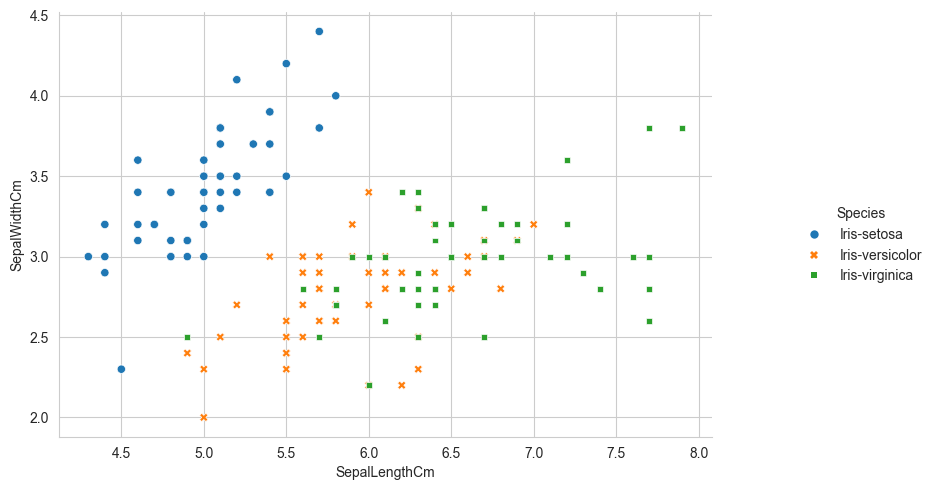

In [262]:
g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

c:\Users\Aydee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


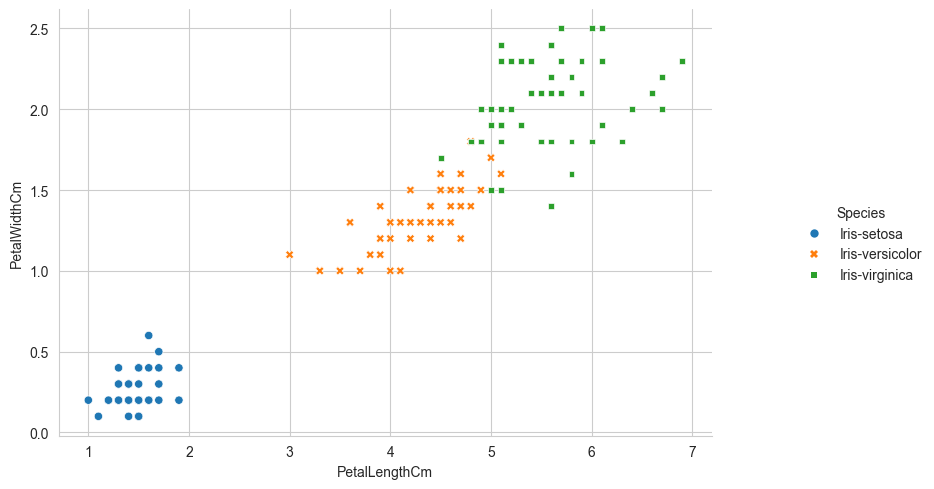

In [263]:
g=sns.relplot(x='PetalLengthCm',y='PetalWidthCm',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

c:\Users\Aydee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


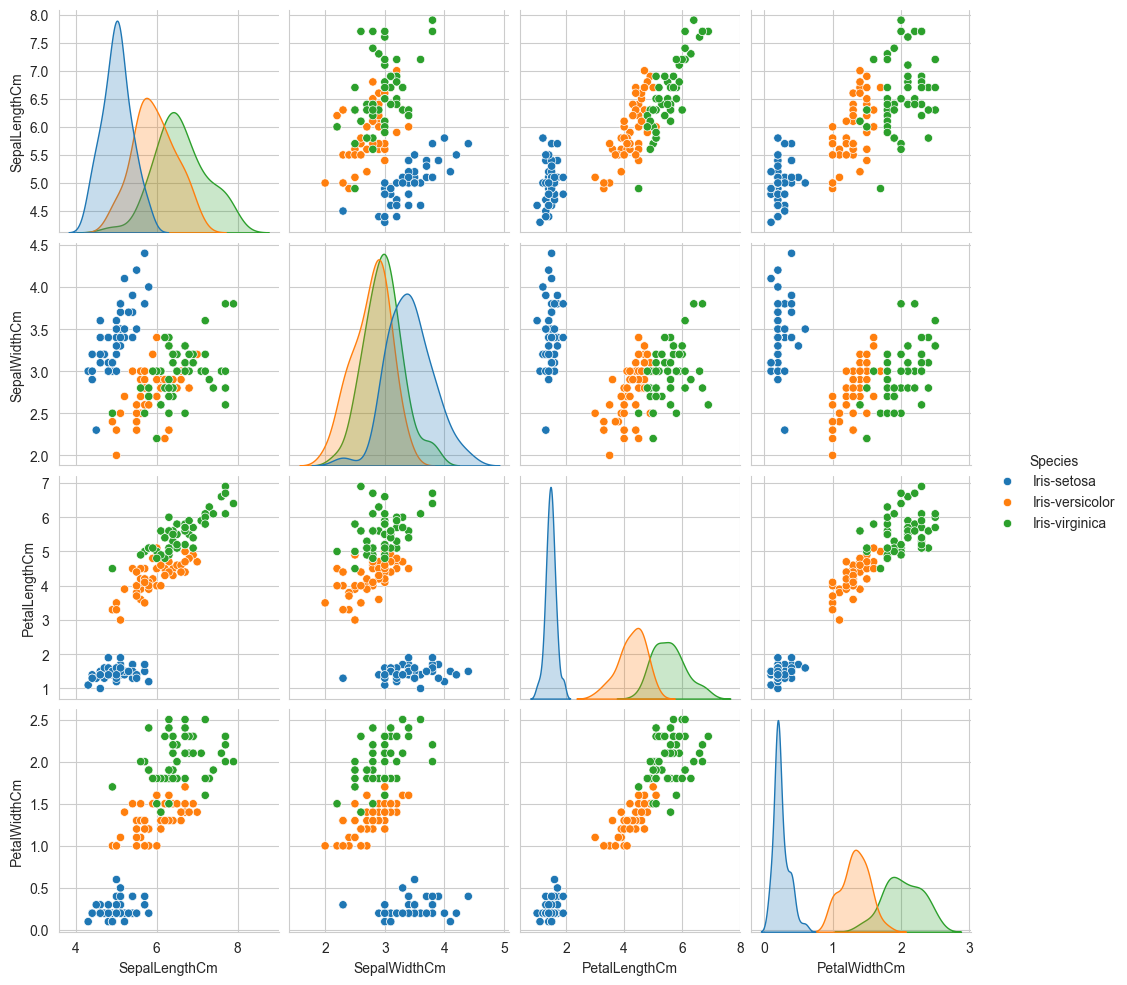

In [264]:
sns.pairplot(iris,hue="Species")
plt.show()

In [265]:
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


In [266]:
from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

Confusion matrix for SVC
 [[16  0  0]
 [ 0 15  3]
 [ 0  0 11]]
accuracy_SVC: 0.933
precision_SVC: 0.933
recall_SVC: 0.933
f1-score_SVC : 0.933


c:\Users\Aydee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [267]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_DecisionTree: 0.978
precision_DecisionTree: 0.978
recall_DecisionTree: 0.978
f1-score_DecisionTree : 0.978


# 2. Escoger una de las combinaciones anteriores para trabajar (1 par) y crear un conjunto de entrenamiento (train 50% de cada clase) y de prueba (test 50%) y graficar ambos conjuntos.

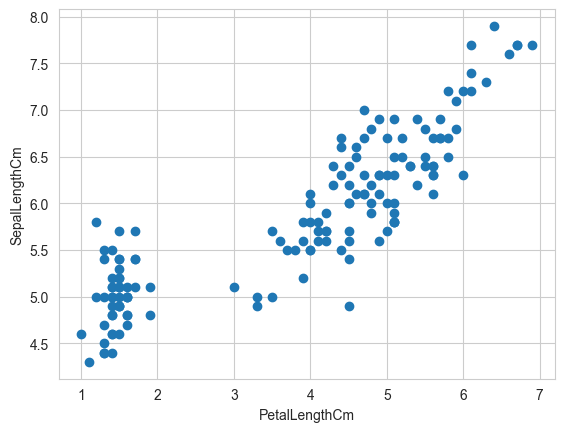

In [268]:
plt.scatter(iris['PetalLengthCm'],iris['SepalLengthCm'])
plt.xlabel('PetalLengthCm')
plt.ylabel('SepalLengthCm')
plt.show()

In [269]:
train_data = []
test_data = []
def split_and_plot_data(df):
    # Ensure the DataFrame is sorted by Species
    df = df.sort_values('Species')

    # Create a dictionary for each unique species with its corresponding data
    data_dict = dict(tuple(df.groupby('Species')))

    # Iterate through each species and split its data
    for species, group_df in data_dict.items():
        train, test = train_test_split(
            group_df, test_size=0.5, stratify=group_df['Species'])

        # Append the train and test iriss
        train_data.append(train)
        test_data.append(test)

    # Combine the train and test iriss
    train_df = pd.concat(train_data)
    test_df = pd.concat(test_data)

    # Plot the train and test datasets using Seaborn
    sns.set_style('whitegrid')
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=train_df)
    sns.scatterplot(
        x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=test_df, marker='x')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Training and Testing Datasets (50% split)')
    plt.show()
    

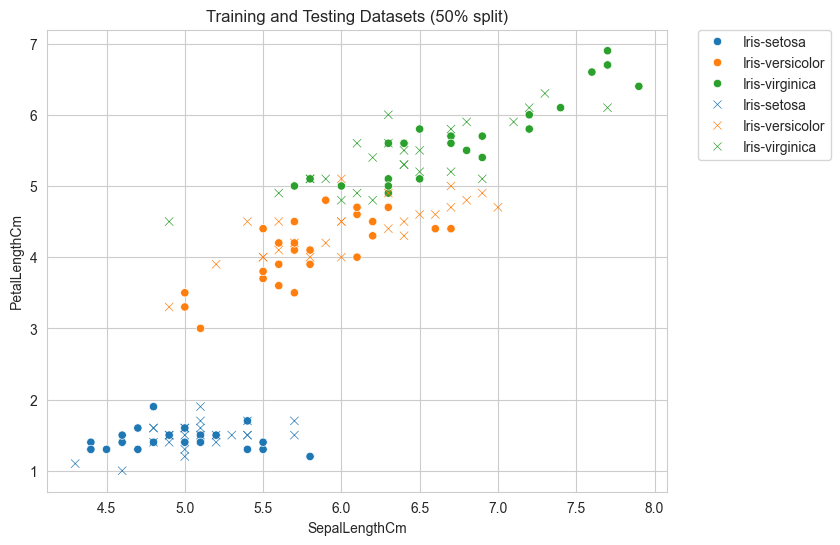

In [270]:
split_and_plot_data(iris)

# 3. Realizar en entrenamiento y clasificación para las 3 clases por el método de Bayes Ingenuo, usando las ecuaciones de la campana de Gauss visto en clases (NO usar toolbox NI funciones que gaussianicen directamente)

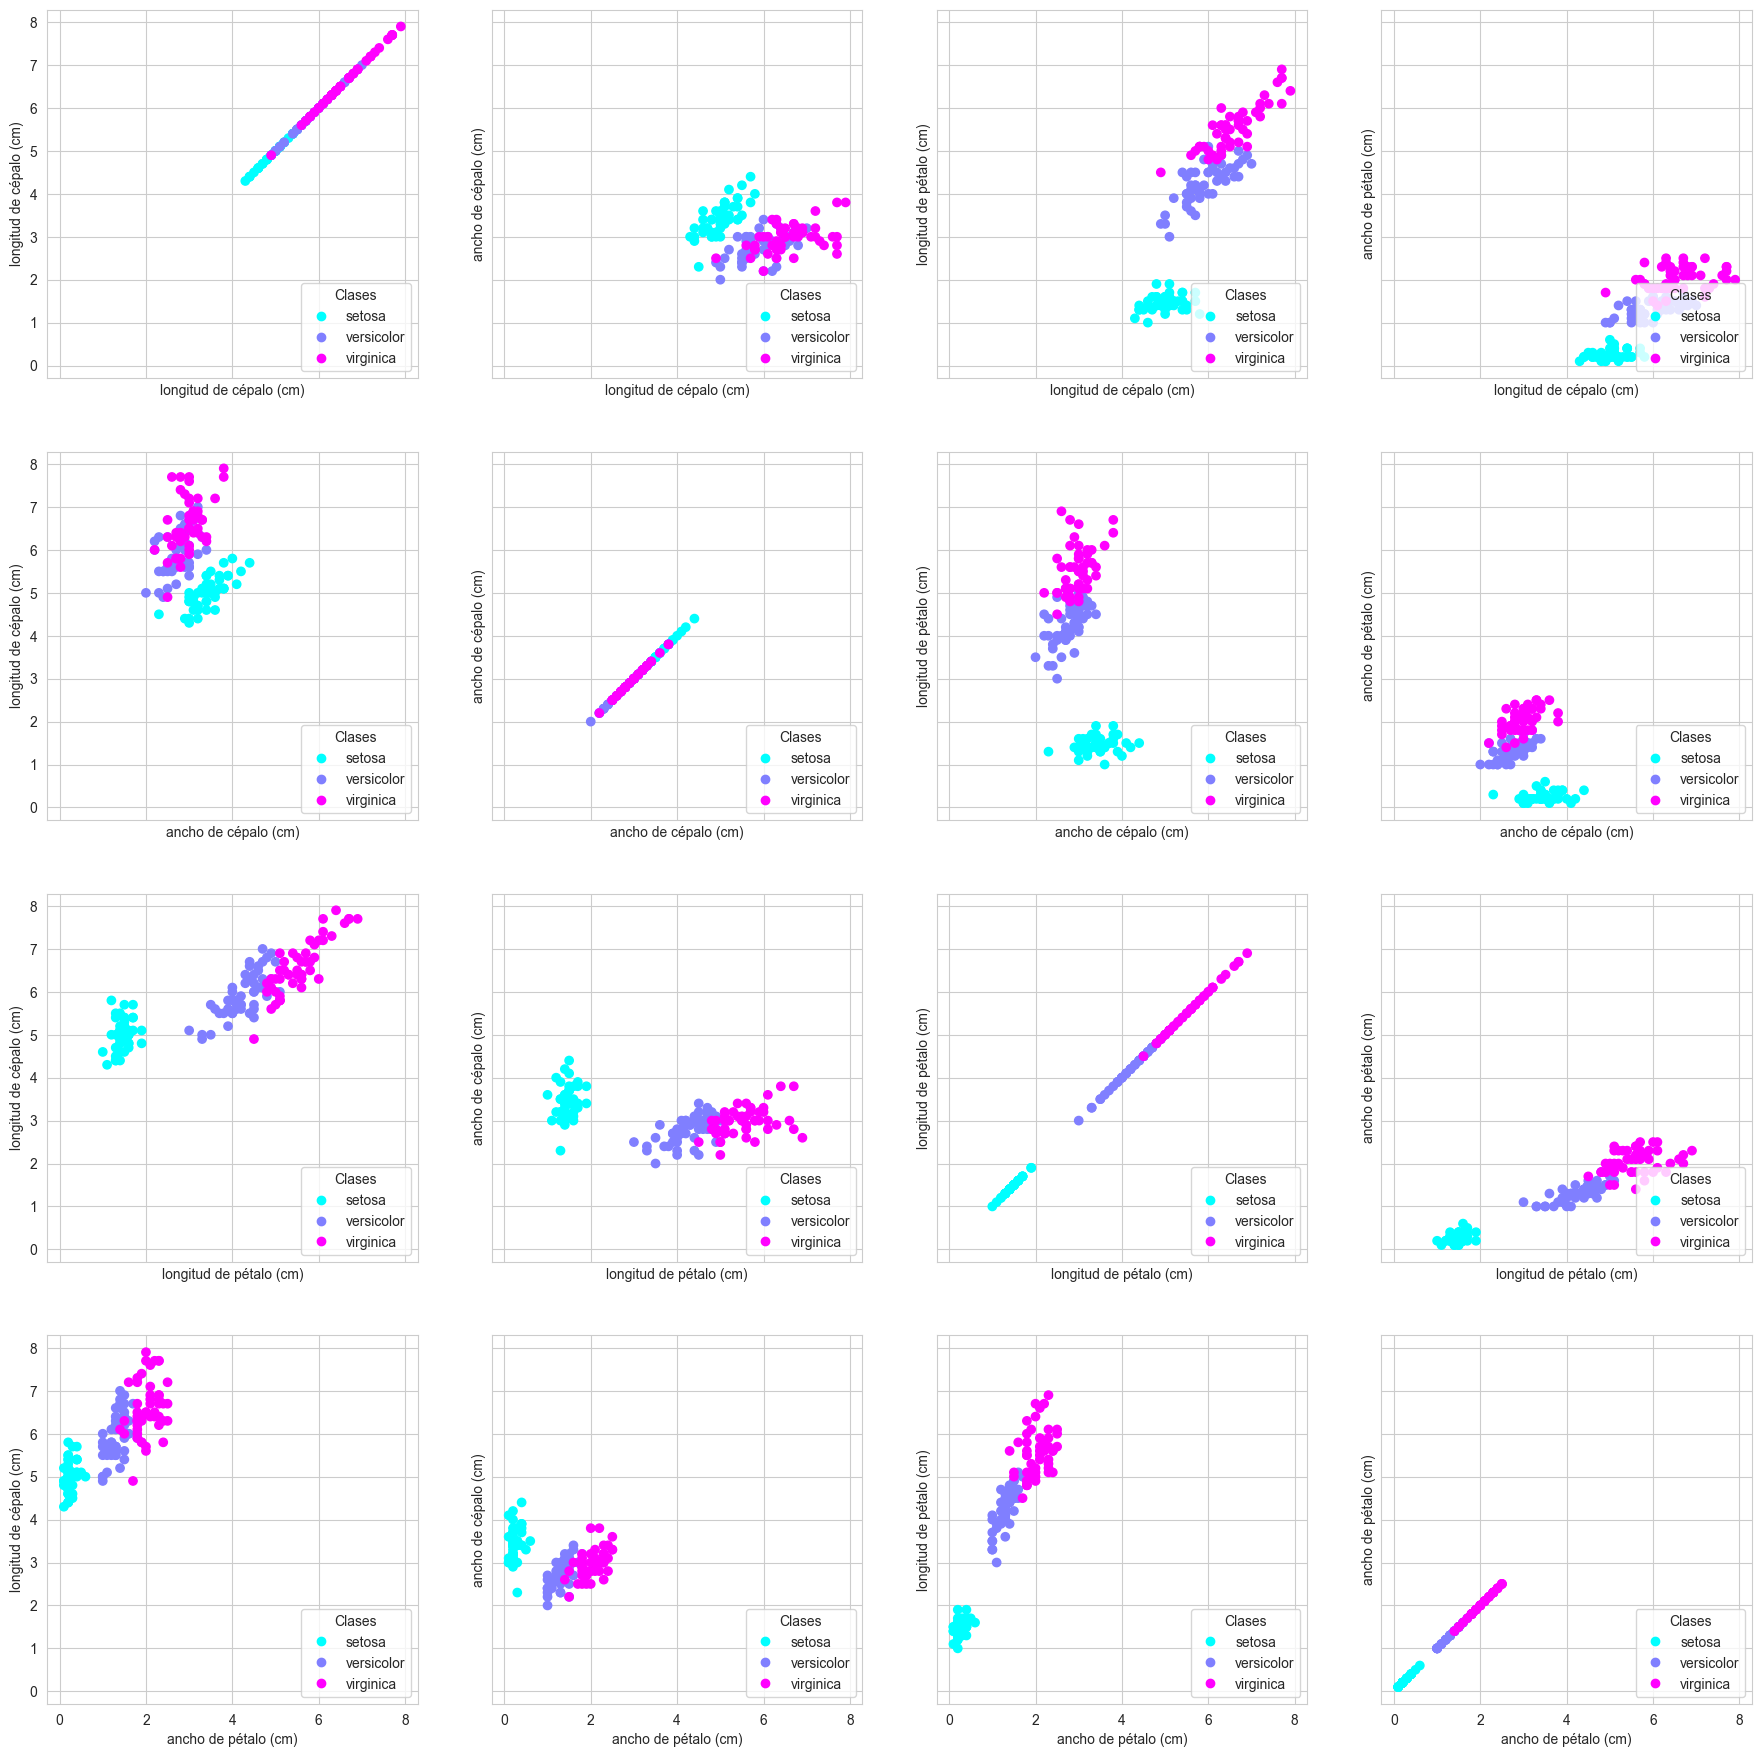

In [271]:
iris = datasets.load_iris()
iris_feature_names_spanish = ['longitud de cépalo (cm)','ancho de cépalo (cm)','longitud de pétalo (cm)','ancho de pétalo (cm)']
fig, ax = plt.subplots(4,4, sharex=True, sharey=True, figsize=(22,22))
for i in range(0,4):
    for j in range(0,4):
        scatter = ax[i,j].scatter(iris.data[:, i], iris.data[:, j], c=iris.target, cmap='cool')
        ax[i,j].set(xlabel=iris_feature_names_spanish[i], ylabel=iris_feature_names_spanish[j])
        fig = ax[i,j].legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Clases")

In [272]:
from sklearn import datasets
import math
import pylab as pl
import random as rm

In [273]:
from random import seed
from random import randrange
from math import sqrt
from math import exp
from math import pi


In [274]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split


In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [276]:
length_petal_train, width_petal_train, colors_train = data_from_indexes(train_set)
length_petal_test, width_petal_test, colors_test = data_from_indexes(test_set)

In [277]:
iris = datasets.load_iris()

# Obtener características y etiquetas para el conjunto de entrenamiento
length_petal_train, width_petal_train, colors_train = data_from_indexes(train_set)

# Calcular parámetros para cada clase y característica
def calculate_parameters(length_petal, width_petal, colors):
    parameters = {}
    for class_value in np.unique(colors):
        indices = np.where(colors == class_value)
        print(indices)
        parameters[class_value] = {
            'length_petal': {'mean': np.mean(length_petal[indices]), 'std': np.std(length_petal[indices])},
            'width_petal': {'mean': np.mean(width_petal[indices]), 'std': np.std(width_petal[indices])}
        }
    return parameters

parameters = calculate_parameters(length_petal_train, width_petal_train, colors_train)
parameters


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24], dtype=int64),)
(array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49], dtype=int64),)
(array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74], dtype=int64),)


{0: {'length_petal': {'mean': 1.444, 'std': 0.1601998751560063},
  'width_petal': {'mean': 0.22, 'std': 0.08944271909999159}},
 1: {'length_petal': {'mean': 4.212, 'std': 0.45897276607659415},
  'width_petal': {'mean': 1.3279999999999998, 'std': 0.1887220177933672}},
 2: {'length_petal': {'mean': 5.544, 'std': 0.5865696889543476},
  'width_petal': {'mean': 2.0239999999999996, 'std': 0.25342454498331446}}}

In [278]:

train_length_petal, train_width_petal, train_colors = data_from_indexes(train_set)
test_length_petal, test_width_petal, test_colors = data_from_indexes(test_set)

# Ahora, implementaremos el clasificador de Bayes Ingenuo

# Preparar datos de entrenamiento para el clasificador
train_data = np.column_stack((train_length_petal, train_width_petal))
train_labels = train_colors

# Calcular medias y desviaciones estándar para cada clase
class_stats = {}

for class_value in np.unique(train_labels):
    class_data = train_data[train_labels == class_value]
    class_stats[class_value] = {'mean': class_data.mean(axis=0), 'std': class_data.std(axis=0)}

# Función de densidad de probabilidad gaussiana
def gaussian_pdf(x, mean, std):
    return (1. / (std * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * std ** 2))

# Función para predecir la clase de una muestra
def predict(sample):
    probabilities = {}
    for class_value, stats in class_stats.items():
        probabilities[class_value] = 1
        for i in range(len(stats['mean'])):
            mean, std = stats['mean'][i], stats['std'][i]
            probabilities[class_value] *= gaussian_pdf(sample[i], mean, std)
    return max(probabilities, key=probabilities.get)

def predict2(sample):
    probabilities = {}
    for class_value, stats in class_stats.items():
        probabilities[class_value] = 1
        for i in range(len(stats['mean'])):
            mean, std = stats['mean'][i], stats['std'][i]
            probabilities[class_value] *= gaussian_pdf(sample[i], mean, std)
    return probabilities

# Predecir el conjunto de prueba
predictions = [predict(sample) for sample in np.column_stack((test_length_petal, test_width_petal))]
#Probabilidades de pertenencia del conjunto de prueba
probabilities = [predict2(sample) for sample in np.column_stack((test_length_petal, test_width_petal))]

# Calcular precisión
accuracy = np.mean(predictions == test_colors)
print("Garantia", accuracy)

Garantia 0.9466666666666667


# 4. Obtener las gráficas de las gaussianas para cada clase 

In [5]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt


AttributeError: 'DataFrame' object has no attribute 'target_names'

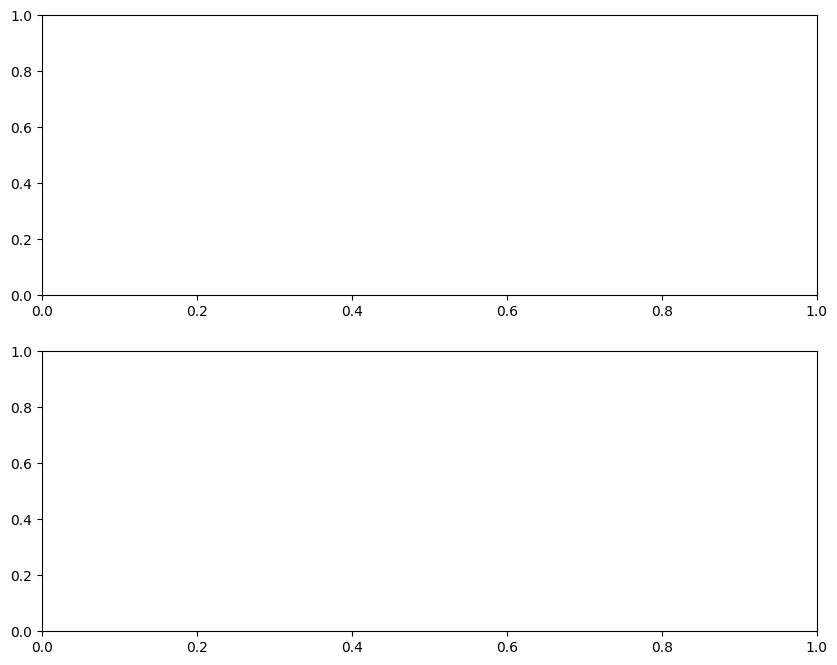

In [15]:
from scipy.stats import norm

x_range = np.linspace(0, 7, 1000)

# Crear las gráficas de las gaussianas para cada clase y característica
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Títulos para las gráficas
titles = ['Distribución de la Longitud de los Pétalos', 'Distribución del Ancho de los Pétalos']
features = ['petal length (cm)', 'petal width (cm)']

for i, feature in enumerate(features):
    for clase in iris.target_names:
        # Obtener la media y la desviación estándar para la clase y característica actual
        mean = stats_por_clase.loc[clase, feature]['mean']
        std = stats_por_clase.loc[clase, feature]['std']
        
        # Calcular la PDF gaussiana para el rango definido
        y = norm.pdf(x_range, mean, std)
        # Graficar
        axes[i].plot(x_range, y, label=f'{clase} (μ={mean:.2f}, σ={std:.2f})')
        axes[i].fill_between(x_range, y, alpha=0.5)
    
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Densidad')
    axes[i].legend()

plt.tight_layout()
plt.show()

# 5. Obtener las tablas de contingencia para cada caso y graficar la curva ROC para la clasificación obtenida.

In [281]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizar las etiquetas en una configuración de Uno-contra-Todos
y_test_binarized = label_binarize(test_colors, classes=[0, 1, 2])
predictions_binarized = label_binarize(predictions, classes=[0, 1, 2])

# Calcular la matriz de confusión para cada clase
conf_matrices = {iris.target_names[i]: confusion_matrix(y_test_binarized[:, i], predictions_binarized[:, i]) for i in range(3)}

# Mostrar las matrices de confusión
conf_matrices

{'setosa': array([[50,  0],
        [ 0, 25]], dtype=int64),
 'versicolor': array([[48,  2],
        [ 2, 23]], dtype=int64),
 'virginica': array([[48,  2],
        [ 2, 23]], dtype=int64)}

In [282]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize

# Asumiendo que 'test_colors' son las etiquetas reales y 'predictions' las etiquetas predichas
# Binarizamos las etiquetas para el enfoque Uno contra Todos
y_true_binarized = label_binarize(test_colors, classes=[0, 1, 2])
predictions_binarized = label_binarize(predictions, classes=[0, 1, 2])

# Calculamos la matriz de confusión para cada clase
confusion_matrices = [confusion_matrix(y_true_binarized[:, i], predictions_binarized[:, i]) for i in range(3)]

# Extraemos VP, FP, VN, FN para cada clase
for i, cm in enumerate(confusion_matrices):
    tn, fp, fn, tp = cm.ravel()
    print(f"Clase {iris.target_names[i]}:")
    print(f" Verdaderos Negativos (VN): {tn}")
    print(f" Falsos Positivos (FP): {fp}")
    print(f" Falsos Negativos (FN): {fn}")
    print(f" Verdaderos Positivos (VP): {tp}\n")

Clase setosa:
 Verdaderos Negativos (VN): 50
 Falsos Positivos (FP): 0
 Falsos Negativos (FN): 0
 Verdaderos Positivos (VP): 25

Clase versicolor:
 Verdaderos Negativos (VN): 48
 Falsos Positivos (FP): 2
 Falsos Negativos (FN): 2
 Verdaderos Positivos (VP): 23

Clase virginica:
 Verdaderos Negativos (VN): 48
 Falsos Positivos (FP): 2
 Falsos Negativos (FN): 2
 Verdaderos Positivos (VP): 23



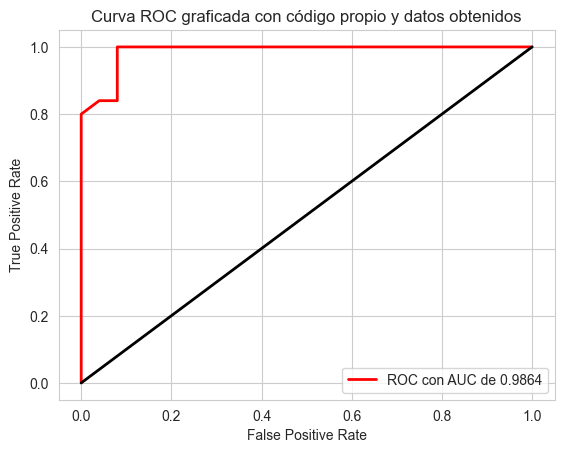

In [283]:
#ROC EN BASE A DATOS

from sklearn.preprocessing import label_binarize

def my_range(start, end, how_many):
    incr = float(end - start)/how_many
    return [start + i*incr for i in range(how_many)]

def perf_metrics(y_actual, y_hat,threshold):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for i in range(len(y_hat)): 
        if(y_hat[i] >= threshold):
            if(y_actual[i] == 1):
                tp += 1
            else:
                fp += 1
        elif(y_hat[i] < threshold):
            if(y_actual[i] == 0):
                tn += 1
            else:
                fn += 1
            
    tpr = tp/(tp+fn)
    fpr = fp/(tn+fp)

    return [fpr,tpr]

y_true_binarized = label_binarize(test_colors, classes=[1, 2])
predictions_binarized = label_binarize(predictions, classes=[1, 2])

probabilities_list = [probabilities[i][1] for i in range(25,len(y_true_binarized))]

thresholds = my_range(0, 1, 100)

aux = [y_true_binarized[i][0] for i in range(25,len(y_true_binarized))]

roc_points = []
for threshold in thresholds:
    rates = perf_metrics(aux, probabilities_list, threshold)
    roc_points.append(rates)
roc_points.append([0,0])

fpr_array_graph = [roc_points[i][0] for i in range(len(roc_points))]
tpr_array_graph = [roc_points[i][1] for i in range(len(roc_points))]

fpr_array = []
tpr_array=[]

for i in range(len(roc_points)-1):
    point1 = roc_points[i];
    point2 = roc_points[i+1]
    tpr_array.append([point1[0], point2[0]])
    fpr_array.append([point1[1], point2[1]])
    
auc = sum(np.trapz(tpr_array,fpr_array))+1

plt.plot(fpr_array_graph,tpr_array_graph, 'r', lw=2, label='ROC con AUC de %0.4f' % auc)
plt.plot([0, 1], [0, 1], 'k-', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC graficada con código propio y datos obtenidos')
plt.legend(loc="lower right")
plt.show()

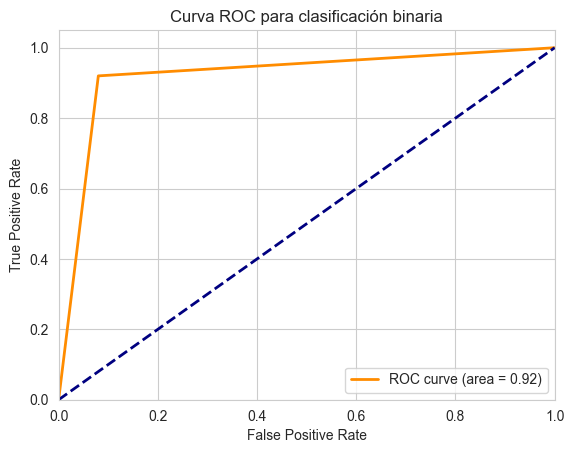

In [284]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

test = test_colors[25:]
prediction = predictions[25:]

for i in range(len(test)):
    if(test[i]==1):
        test[i] = 1
    else:
        test[i] = 0
    if(prediction[i]==1):
        prediction[i] = 1
    else:
        prediction[i] = 0


fpr, tpr, thresholds = roc_curve(test, prediction)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para clasificación binaria')
plt.legend(loc="lower right")
plt.show()